In [ ]:
''' In this project, I will be using machine learning to create a logistic model that will predict whether a person has a stroke
    based on parameters such as gender, age, hypertension, heart disease, BMI, etc.
    I obtained this dataset on Kaggle (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)
'''

# We first import the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Now, we import our dataset into a Pandas dataframe

df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
# We look for general information about our data. We see that we have some object data types which we will deal with. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# We explore the gender column. We first see the value counts. We see that there is only Other entry. Since this 
# single entry does not impact the dataset as a whole, we will drop this row. 

df['gender'].value_counts()

# We first find the index of the row this entry is located and then drop it.

df[df.eq("Other").any(axis=1)]
df = df.drop(index=3116)

# Now we convert the entries of this column into 1 for Male and 0 for Female
df['gender'] = df['gender'].replace(['Male', 'Female'], [1, 0])

In [ ]:
# Similarly, since the columns ever_married and Residence_type have only two possible values we convert them into binary values.

df['ever_married'] = df['ever_married'].replace(['Yes', 'No'], [1, 0])
df['Residence_type'] = df['Residence_type'].replace(['Urban', 'Rural'], [1, 0])

In [ ]:
# Now, we explore the smoking_status

df['smoking_status'].value_counts()

# Since there are 1544 unknown values we can assume that they correspond to the never smoked category since this 
# is the mode of this column.

df['smoking_status'] = df['smoking_status'].replace(['Unknown'], ['never smoked'])

In [ ]:
# Now, we see that the BMI column have some null values, so we fill them with the average. 
df['bmi'].fillna(value=df['bmi'].mean(), inplace=True)
df.reset_index(drop=True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.60000,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,28.89456,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.50000,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.40000,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.00000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,0,80.0,1,0,1,Private,1,83.75,28.89456,never smoked,0
5105,44873,0,81.0,0,0,1,Self-employed,1,125.20,40.00000,never smoked,0
5106,19723,0,35.0,0,0,1,Self-employed,0,82.99,30.60000,never smoked,0
5107,37544,1,51.0,0,0,1,Private,0,166.29,25.60000,formerly smoked,0


In [ ]:
# Lastly, we see that the columns work_type and smoking_status are categorical features that have more than 2 values.
# Therefore, we implement one hot encoder.

df = df.join(pd.get_dummies(df['work_type'])).drop(['work_type'], axis = 1)
df = df.join(pd.get_dummies(df['smoking_status'])).drop(['smoking_status'], axis = 1)

<Axes: >

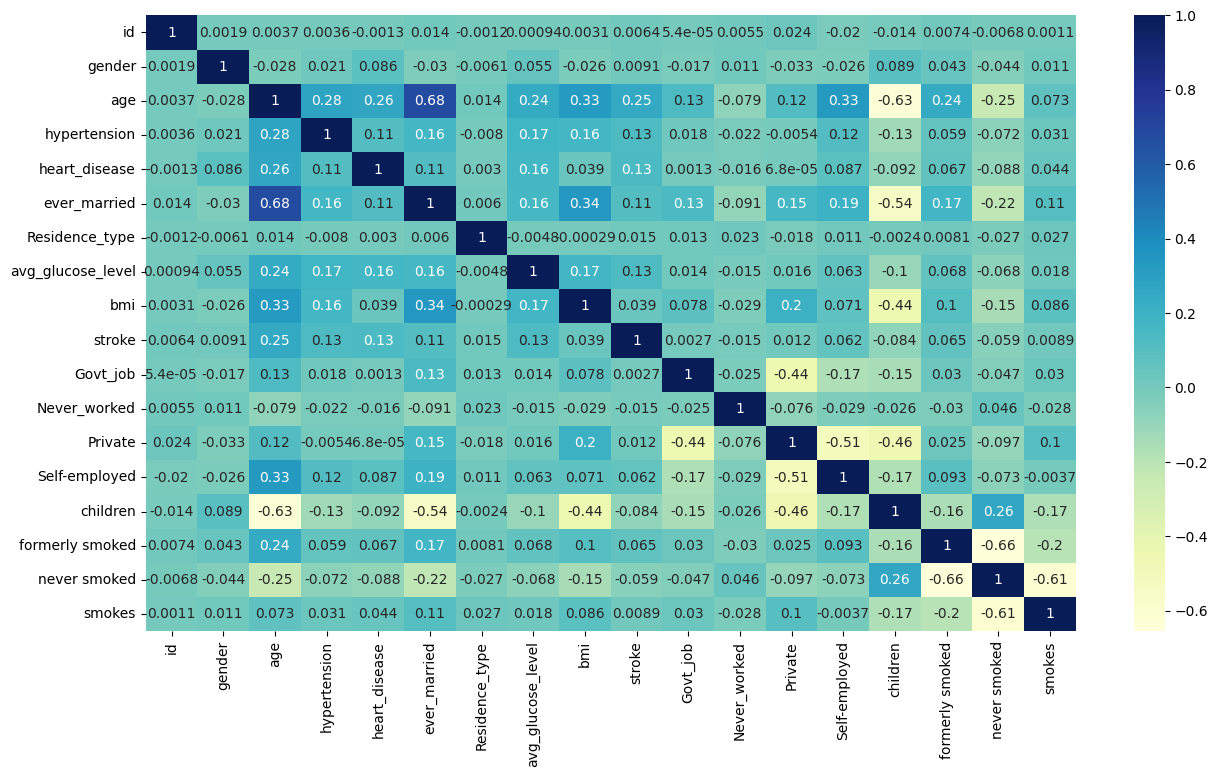

In [ ]:
# Now that we have dealt with our data, we can start doing some further exploration.
# We will create a heatmap to see the correlation between the features.

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [ ]:
# Based on this heatmap we see that the features age, hypertension, ever_married, and avg_glucose_level have the highest 
# correlation with stroke. The other features have similar correlations so we should not drop any.

<Axes: >

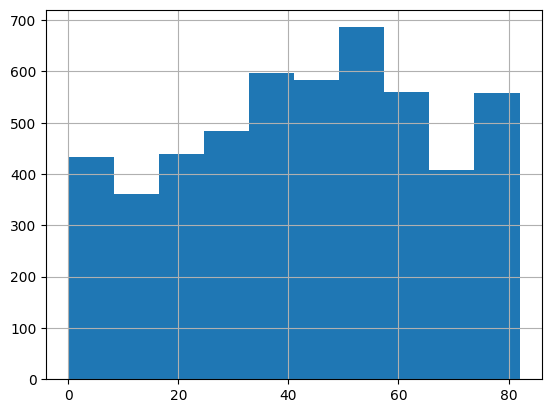

In [ ]:
# Since age and avg_glucose_level are the numerical features that have the strongest correlation with stroke, 
# we need to check what distribution they follow.

df['age'].hist()

<Axes: >

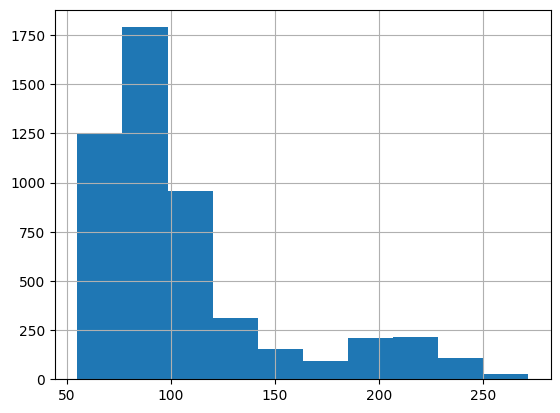

In [ ]:
df['avg_glucose_level'].hist()

<Axes: >

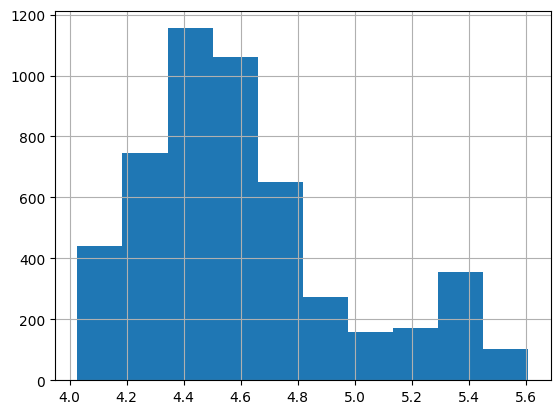

In [ ]:
# We see that while age follows somewhat a normal distribution, avg_glucose_level is skewed. So we normalize it.

df['avg_glucose_level'] = np.log(df['avg_glucose_level'] + 1)
df['avg_glucose_level'].hist()

In [ ]:
# Now that we have explored and cleaned our data, let's prepare our data for training. 

# We create our sample matrix X by removing the columns id and stroke and create our target vector y
# by assigning the column stroke to it.

X = df.drop(['id','stroke'], axis=1)
y = df['stroke']

In [ ]:
# Now we split our data into training and validation with a 90/10 split.

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# Now we are ready to train our model. We use a logistic regression from Scikitlearn. 

log_reg = LogisticRegression(random_state=0, max_iter=1000)

model = log_reg.fit(X_train,y_train)

In [ ]:
predictions = model.predict(X_val)
accuracy_score(y_val, predictions)

0.9452054794520548

In [ ]:
# Great! we see that our accuracy is about 94.5%. 